In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import cmath
import math
from pylab import *
from matplotlib import rc, rcParams
!mkdir data_repository

In [2]:
# Computing the density of pair-connections (\rho_i), cooperators (x),
# and the normalized level of resource (R') as a function of network mean degree \mu
# using the numerical integration of rate equations

Rp0_list=[0.1,0.5,0.9]
x0_list=[0.1,0.5,0.9]
for Rp0 in Rp0_list:
    for x0 in x0_list:
        mu=0
        l0=.5
        e_C=.9
        e_D=1.9
        rho_0=np.zeros(int(7), dtype=float)
        rho_0[0]=x0*x0*(1-l0)
        rho_0[1]=x0*x0*l0 
        rho_0[2]=(1-x0)*(1-x0)*(1-l0) 
        rho_0[3]=(1-x0)*(1-x0)*l0
        rho_0[4]=2*x0*(1-x0)*l0
        rho_0[5]=2*x0*(1-x0)*(1-l0)
        rho_0[6]=(Rp0)*(1-e_C)
        Range = np.arange(1,20, .2)
        R=[]
        f=[]
        x=[]
        for k in Range:

            def solution(rho, t):

                rho_dot = np.zeros(7, dtype=float)

                R=rho[6]/(1-e_C)

                khi = rho[0]+ rho[1]+ rho[4]/2+ rho[5]/2
                phi = rho[2]+ rho[3]+ rho[4]/2+ rho[5]/2


                rho_dot[0] = -rho[0] + (k-1) * \
                                 (-(R/khi)*(rho[0]+rho[4])*rho[0] + ((1-R)/(2*phi))*(rho[2]+rho[4]/2)*rho[5])


                rho_dot[1] = (1-R)*rho[0] + ((1-R)/2)*rho[4] + (k-1)* \
                                 (-(R/khi)*(rho[0]+rho[4])*rho[1]+ ((1-R)/(2*phi))*(rho[2]+rho[4]/2)*rho[4])


                rho_dot[2] =  -rho[2] + (k-1) * \
                                ((R/(2*khi))*(rho[0]+rho[4])*rho[5] - ((1-R)/phi)*(rho[2]+rho[4]/2)*rho[2])


                rho_dot[3] = R*rho[2] + R*rho[4]+ (k-1) * \
                                  ((R/(2*khi))*(rho[0]+rho[4])*rho[4] - ((1-R)/phi)*(rho[2]+rho[4]/2)*rho[3])


                rho_dot[4] = -rho[4] + (k-1)*\
                        ((R/khi)*(rho[0]+rho[4])*(rho[1]-rho[4]/2)+((1-R)/phi)*(rho[2]+rho[4]/2)*(rho[3]-rho[4]/2) )

                rho_dot[5] = R*rho[0] + (1-R)*(rho[2]+rho[4]/2)+(k-1)*\
                        ((R/khi)*(rho[0]+rho[4])*(rho[0]-rho[5]/2)+((1-R)/phi)*(rho[2]+rho[4]/2)*(rho[2]-rho[5]/2) )


                rho_dot[6] = rho[6]*(1-rho[6])-rho[6]*(e_C*khi+e_D*phi)



                return  rho_dot.tolist()



            t=np.linspace(0,100000,1000000)

            X=odeint(solution, rho_0, t)
            tt=len(t)
            R.append(X[-1,6])
            f.append(X[-1,5])
            x.append(X[-1,0]+X[-1,1]+.5*(X[-1,4]+X[-1,5]))


        np.savetxt("data_repository/R_%.2f_%.2f.txt" % (Rp0,x0), R)
        np.savetxt("data_repository/f_%.2f_%.2f.txt" % (Rp0,x0), f)
        np.savetxt("data_repository/x_%.2f_%.2f.txt" % (Rp0,x0), x)

            
            
            
            

    

    

In [31]:
# Computing the density of pair-connections (\rho_i), cooperators (x),
# and the normalized level of resource (R') as a function of network mean degree \mu
# using the Monte-Carlo simulations



#Creating a network
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import sys
from joblib import Parallel, delayed

# x=random.randint()
def Sus(N,k,Rp0,x0,o):
    
    # k=int(sys.argv[1])
    l0=0.5
    # g=int(sys.argv[2])
    e_C=.9
    e_D=1.9
    R=Rp0*(1-e_C)
    coun=1000
    N_MC=4000000
    # o=int(sys.argv[3])
    #### Network Creating #####################################################################
    # G=nx.Graph(G)
#     G=nx.barabasi_albert_graph(N, int(k/2), seed=None , initial_graph=None)
    G=nx.erdos_renyi_graph(N, k/N, seed=None, directed=False)
    # actual_degrees = [d for v, d in G.degree()]

    #### Seting the initial values #####################################################################

    opinion = [*np.ones(int(x0*N)), *(-np.ones(int((1-x0)*N)))]
    if len(opinion)!=N:
        opinion.append(-1.0)
    random.shuffle(opinion)

    # print(opinion)
    # nx.set_node_attributes(G, opinion, "opinion")
    for node in G.nodes:
        G.nodes[node]["opinion"] = opinion[node]

    L=G.number_of_edges()
    #print(L)
    interaction = [*np.ones(int(l0*L)), *(-np.ones(int((1-l0)*L)))]
    if len(interaction)!=L:
        interaction.append(-1.0)
    # print(interaction)
    random.shuffle(interaction)
    # print(interaction)

    # nx.set_edge_attributes(G, interaction, "interaction")
    t=0
    for edge in G.edges:
        G.edges[edge]["interaction"] = interaction[t]
        t+=1
    del t
    Edge_List=list(G.edges)
    # Node_List=list(G.nodes)


    #### Time evolution of densities  #####################################################################

    # st = time.process_time()

    for h in range(N_MC):
        L1=random.randint(0, L-1)
    #     print(L1)
        Edge_List[L1]
        m=G.nodes[Edge_List[L1][0]]["opinion"]
        n=G.nodes[Edge_List[L1][1]]["opinion"]
        oo=G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]

        P_l=m*n*oo
        P_e=m+n
        P_n= np.random.randint(2)
        p_R = random.uniform(0,1) 
        p_p = random.uniform(0,1)

        if (P_l==-1 and P_e==2):
            if (p_R<(R/(1-e_C))):
                G.nodes[Edge_List[L1][P_n]]["opinion"]=-1
            else:
                G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]=1


        if (P_l==-1 and P_e==-2):
            if (p_R<(R/(1-e_C))):
                G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]=1
            else:
                G.nodes[Edge_List[L1][P_n]]["opinion"]=1


        if (P_l==-1 and P_e==0):
            if (p_R<(R/(1-e_C))):
                G.nodes[Edge_List[L1][0]]["opinion"]=-1
                G.nodes[Edge_List[L1][1]]["opinion"]=-1
            else:
                if(p_p<.5):
                    G.nodes[Edge_List[L1][0]]["opinion"]=1
                    G.nodes[Edge_List[L1][1]]["opinion"]=1
                else:
                    G[Edge_List[L1][0]][Edge_List[L1][1]]["interaction"]=-1

        nn=0
        for i in range(N):
            nn=nn+(G.nodes[i]["opinion"]+1)/2;
        ng=nn/N
        R=R+(R*(1-R)-R*(ng*e_C+(1-ng)*e_D))/L;

    Rhompp=0
    Rhopmp=0
    Rhommm=0
    Rhoppp=0
    Rhompm=0
    Rhommp=0
    for i in range(L):
        m=G.nodes[Edge_List[i][0]]["opinion"]
        n=G.nodes[Edge_List[i][1]]["opinion"]
        oo=G[Edge_List[i][0]][Edge_List[i][1]]["interaction"]
    #         print(m,n,o)
        P_k=(m+n+3*oo)
    #         print(P_k)
        if P_k ==3:
            Rhompp+=1
        if P_k ==-1:
            Rhopmp+=1
        if P_k ==-5:
            Rhommm+=1
        if P_k ==5:
            Rhoppp+=1
        if P_k ==1:
            Rhompm+=1
        if P_k ==-3:
            Rhommp+=1
    a=Rhopmp/L
    c=Rhommm/L
    b=Rhoppp/L
    d=Rhompm/L
    e=Rhompp/L
    f=Rhommp/L
    x=ng
    Rp=R/(1-e_C)
    all_results =[a,b,c,d,e,f,Rp,ng,a+b+.5*(e+f),c+d+.5*(e+f)]
    np.save('data_repository/Sus_%d_%d_%.1f_%.1f_%.2f_0.5_%.1f_%d' % (N,k,e_C,e_D,x0,Rp0,o), all_results)

 
N_list=[4000]
k_list=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
Rp0_list=[1/10,1/2,9/10]
x0_list=[1/10,1/2,9/10]

results = Parallel(n_jobs=8)(delayed(Sus)(y,i,m,n,j) for y in N_list for i in k_list for m in Rp0_list for n in x0_list for j in range(20))
# I use a hpc machine with n_jobs=256

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


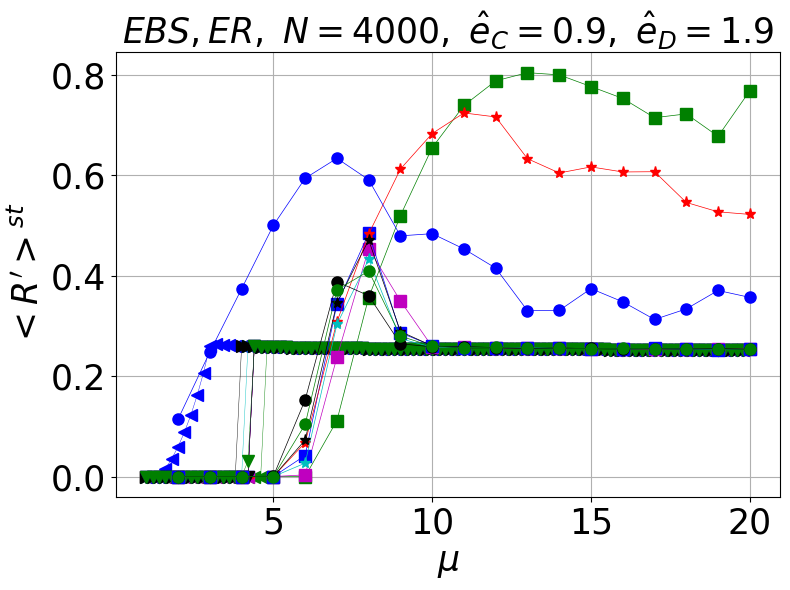

In [4]:
# Plotting the <R'> as function of \mu
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import cmath
import math
from pylab import *
import matplotlib.pyplot as plt
csfont = {'fontname':'Times New Roman'}
f=figure(figsize=(8,6))
Color=["g","m","b","r","c","k","b","k","g"]
Marker=['<','<','<',">",">",">","v","v","v"]

Range = np.arange(1, 20,.2)
Range_k = np.arange(2,21,1)
e_C=.9
e_D=1.9

Rp0_list=[0.1,0.5,0.9]
x0_list=[0.1,0.5,0.9]
t=0
for Rp0 in Rp0_list:
    for x0 in x0_list:
        R=np.loadtxt("data_repository/R_%.2f_%.2f.txt" %(Rp0,x0))
        plt.plot(Range,R/(1-e_C),marker=Marker[t], markersize=8, color=Color[t], lw=.3, label="$RE,R^{'}_0=%.1f,x_0=%.1f$" %(Rp0,x0) )
        t+=1
        
N=4000
N_Ens=100
t=0
Marker=['s','s','s',"*","*","*","o","o","o"]
for Rp0 in Rp0_list:
    for x0 in x0_list:
        globals()['R_%.1f_x_%.1f' % (Rp0,x0)] = []  
        for k in Range_k:
            globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)] = 0  
            for o in range(N_Ens):
                R_x_s=np.load("data_repository/Sus_%d_%d_%.1f_%.1f_%.2f_0.5_%.1f_%d.npy" % (N,k,e_C,e_D,Rp0,x0,o))
                globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)]=globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)]+R_x_s[6]/N_Ens
            globals()['R_%.1f_x_%.1f' % (Rp0,x0)].append(globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)])
        plt.plot(Range_k,globals()['R_%.1f_x_%.1f' % (Rp0,x0)], marker=Marker[t],markersize=8, lw=.5, color=Color[t], label="$MC,R^{'}_0=%.1f, x_0=%.1f$" %  (Rp0,x0))
        t+=1

# plt.xscale("log")   
plt.ylabel('$<R^{\prime}>^{st}$', fontsize=25)
plt.xlabel('$\\mu$', fontsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.title('$EBS, ER, \ N=4000, \ \hat{e}_C=%.1f, \ \hat{e}_D=%.1f$' % (e_C,e_D),fontsize=25,**csfont)
plt.tight_layout()
plt.grid(True)
# plt.legend(loc ="upper left", fontsize=8,bbox_to_anchor=(.9, .96))

plt.savefig('Sus_PT_MC_initi_R_ER_ave_%.1f.eps'  % (e_D), format='eps')



findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.


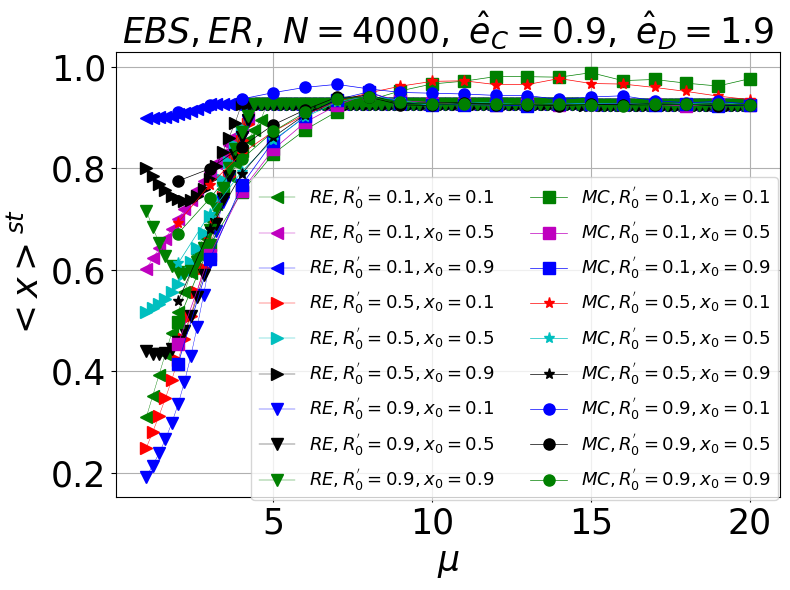

In [6]:
# Plotting the <x> as function of \mu
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import cmath
import math
from pylab import *
import matplotlib.pyplot as plt
csfont = {'fontname':'Times New Roman'}
f=figure(figsize=(8,6))
Color=["g","m","b","r","c","k","b","k","g"]
Marker=['<','<','<',">",">",">","v","v","v"]

Range = np.arange(1, 20,.2)
Range_k = np.arange(2, 21,1)
e_C=.9
e_D=1.9

Rp0_list=[0.1,0.5,0.9]
x0_list=[0.1,0.5,0.9]
t=0
for Rp0 in Rp0_list:
    for x0 in x0_list:
        x=np.loadtxt("data_repository/x_%.2f_%.2f.txt" %(Rp0,x0))
        plt.plot(Range,x,marker=Marker[t], markersize=8, color=Color[t], lw=.3, label="$RE,R^{'}_0=%.1f,x_0=%.1f$" %(Rp0,x0) )
        t+=1
        

N=4000
N_Ens=20
t=0
Marker=['s','s','s',"*","*","*","o","o","o"]
for Rp0 in Rp0_list:
    for x0 in x0_list:
        globals()['R_%.1f_x_%.1f' % (Rp0,x0)] = []  
        for k in Range_k:
            globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)] = 0  
            for o in range(N_Ens):
                R_x_s=np.load("data_repository/Sus_%d_%d_%.1f_%.1f_%.2f_0.5_%.1f_%d.npy" % (N,k,e_C,e_D,Rp0,x0,o))
                globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)]=globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)]+R_x_s[7]/N_Ens
            globals()['R_%.1f_x_%.1f' % (Rp0,x0)].append(globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)])
        plt.plot(Range_k,globals()['R_%.1f_x_%.1f' % (Rp0,x0)], marker=Marker[t],markersize=8, lw=.5, color=Color[t], label="$MC,R^{'}_0=%.1f, x_0=%.1f$" %  (Rp0,x0))
        t+=1
        
# plt.xscale("log")
plt.ylabel('$<x>^{st}$', fontsize=25)
plt.xlabel('$\\mu$', fontsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.title('$EBS, ER, \ N=4000, \ \hat{e}_C=%.1f, \ \hat{e}_D=%.1f$' % (e_C,e_D),fontsize=25,**csfont)
plt.tight_layout()
plt.grid(True)
plt.legend(loc ="upper left", fontsize=13,bbox_to_anchor=(.19, 0.74),ncol=2)
plt.savefig('Sus_PT_MC_initi_R_ER_ave_x_%.1f.eps'  % (e_D), format='eps')



findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


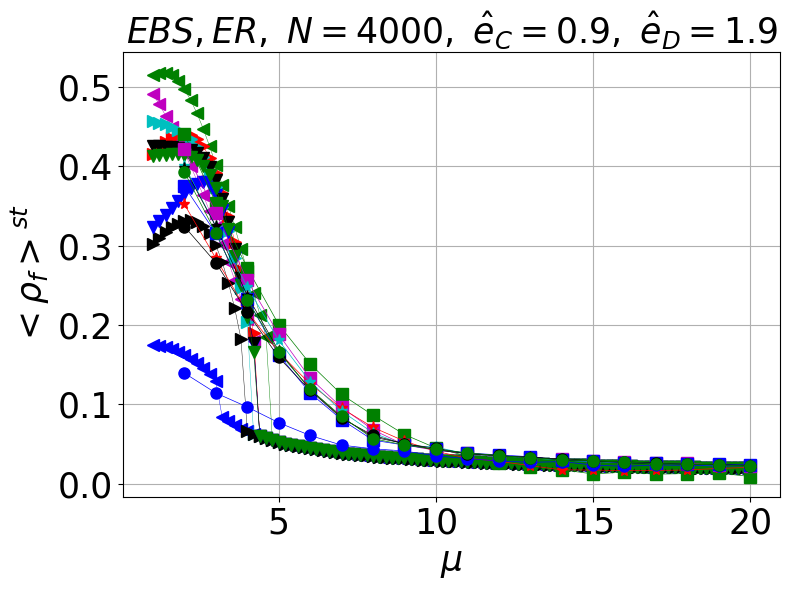

In [7]:
# Plotting the <f> as function of \mu
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
import cmath
import math
from pylab import *
import matplotlib.pyplot as plt
csfont = {'fontname':'Times New Roman'}
f=figure(figsize=(8,6))
Color=["g","m","b","r","c","k","b","k","g"]
Marker=['<','<','<',">",">",">","v","v","v"]

Range = np.arange(1, 20,.2)
Range_k = np.arange(2, 21,1)
e_C=.9
e_D=1.9

Rp0_list=[0.1,0.5,0.9]
x0_list=[0.1,0.5,0.9]
t=0
for Rp0 in Rp0_list:
    for x0 in x0_list:
        f=np.loadtxt("data_repository/f_%.2f_%.2f.txt" %(Rp0,x0))
        plt.plot(Range,f,marker=Marker[t], markersize=8, color=Color[t], lw=.3, label="$RE,R^{'}_0=%.1f,x_0=%.1f$" %(Rp0,x0) )
        t+=1
        

N=4000
N_Ens=20
t=0
Marker=['s','s','s',"*","*","*","o","o","o"]
for Rp0 in Rp0_list:
    for x0 in x0_list:
        globals()['R_%.1f_x_%.1f' % (Rp0,x0)] = []  
        for k in Range_k:
            globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)] = 0  
            for o in range(N_Ens):
                R_x_s=np.load("data_repository/Sus_%d_%d_%.1f_%.1f_%.2f_0.5_%.1f_%d.npy" % (N,k,e_C,e_D,Rp0,x0,o))
                globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)]=globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)]+R_x_s[5]/N_Ens
            globals()['R_%.1f_x_%.1f' % (Rp0,x0)].append(globals()['R_%.1f_x_%.1f_ave' % (Rp0,x0)])
        plt.plot(Range_k,globals()['R_%.1f_x_%.1f' % (Rp0,x0)], marker=Marker[t],markersize=8, lw=.5, color=Color[t], label="$MC,R^{'}_0=%.1f, x_0=%.1f$" %  (Rp0,x0))
        t+=1
        

plt.ylabel('$<\\rho_f>^{st}$', fontsize=25)
# plt.xscale("log")

plt.xlabel('$\\mu$', fontsize=25)
plt.rc('xtick',labelsize=25)
plt.rc('ytick',labelsize=25)
plt.title('$EBS, ER, \ N=4000, \ \hat{e}_C=%.1f, \ \hat{e}_D=%.1f$' % (e_C,e_D),fontsize=25,**csfont)
plt.tight_layout()
plt.grid(True)
# plt.legend(loc ="upper left", fontsize=12,bbox_to_anchor=(.24, 1.01),ncol=2)

plt.savefig('Sus_PT_MC_initi_R_ER_ave_f_%.1f.eps'  % (e_D), format='eps')

